In [77]:
from tqdm import tqdm

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns  # For nicer heatmaps
import numpy as np
from imblearn.over_sampling import SMOTE

In [68]:
def train_test_prep(X,y, oversampling=False, sampling_strategy=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    if oversampling==True:
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)  # Adjust ratio (e.g., 10% True)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test 

In [69]:
df_ml = pd.read_csv("./torch_approach_2.csv")
df_ml

,Leistungseintritt,Reisedauer,Nettoumsatz,Kommission,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc,Reise_Ratio,Reise_oftBesucht,...,Reiseziel_UNITED ARAB EMIRATES,Reiseziel_UNITED KINGDOM,Reiseziel_UNITED STATES,Reiseziel_URUGUAY,Reiseziel_UZBEKISTAN,Reiseziel_VANUATU,Reiseziel_VENEZUELA,Reiseziel_VIET NAM,Reiseziel_ZAMBIA,Reiseziel_ZIMBABWE
0,0,186,-29.0,9.57,81,9,1013.10,0.062280,0.387924,1,...,False,False,False,False,False,False,False,False,False,False
1,0,186,-29.0,9.57,71,9,1013.10,0.062280,0.387924,1,...,False,False,False,False,False,False,False,False,False,False
2,0,65,-49.5,29.70,32,10,277825.68,0.011844,1.028695,1,...,False,False,False,False,False,False,False,False,False,False
3,0,60,-39.6,23.76,32,10,277825.68,0.011421,1.028695,1,...,False,False,False,False,False,False,False,False,False,False
4,0,79,-19.8,11.88,41,10,277825.68,0.013729,1.978022,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63316,0,111,35.0,12.25,31,5,74436.95,0.021920,0.679282,1,...,False,False,False,False,False,False,False,False,False,False
63317,0,58,40.0,14.00,40,5,74436.95,0.011289,0.959333,1,...,False,False,False,False,False,False,False,False,False,False
63318,0,2,18.0,6.30,57,5,74436.95,0.016154,0.387924,1,...,False,False,False,False,False,False,False,False,False,False
63319,0,3,18.0,6.30,63,5,74436.95,0.015922,0.718993,1,...,False,False,False,False,False,False,False,True,False,False


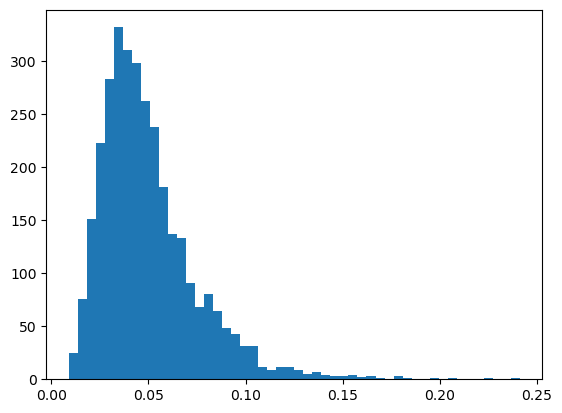

In [44]:
plt.hist(attn_weights_block1.ravel(), bins=50)
plt.show()

# DEEP LEARNING APPROACH

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

class AttentionBlock(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, dropout=0.1):
        super(AttentionBlock, self).__init__()
        # Ensure num_heads divides input_dim evenly
        assert input_dim % num_heads == 0, "input_dim must be divisible by num_heads"
        
        self.attn = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout, batch_first=True)
        self.dropout_attn = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(input_dim)
        
        self.linear = nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()
        self.dropout_linear = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(output_dim)

    def forward(self, x):
        # Self-attention
        attn_output, _ = self.attn(x, x, x)
        attn_output = self.dropout_attn(attn_output)
        x = self.norm1(x + attn_output)
        
        # Feed forward
        linear_output = self.linear(x)
        linear_output = self.activation(linear_output)
        linear_output = self.dropout_linear(linear_output)
        # x = self.norm2(linear_output)
        
        return x

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, num_heads, num_classes, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.block1 = AttentionBlock(input_dim=input_dim, output_dim=hidden_dim1, num_heads=num_heads, dropout=dropout)
        self.block2 = AttentionBlock(input_dim=hidden_dim1, output_dim=hidden_dim2, num_heads=num_heads, dropout=dropout)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(hidden_dim2, num_classes)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = x.transpose(1, 2)
        x = self.pool(x).squeeze(-1)
        x = self.fc(x)
        return x

In [ ]:


def prepare_data(X_train, X_test, y_train, y_test, embedding_dim=64, batch_size=32):
    # Convert to numpy arrays
    X_train_np = X_train.to_numpy().astype(np.float32)
    X_test_np = X_test.to_numpy().astype(np.float32)
    y_train_np = y_train.to_numpy().astype(np.int64)
    y_test_np = y_test.to_numpy().astype(np.int64)
    
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_np)
    X_test_tensor = torch.tensor(X_test_np)
    y_train_tensor = torch.tensor(y_train_np)
    y_test_tensor = torch.tensor(y_test_np)
    
    # Add sequence dimension and project
    X_train_tensor = X_train_tensor.unsqueeze(-1)
    X_test_tensor = X_test_tensor.unsqueeze(-1)
    
    projection = nn.Linear(1, embedding_dim)
    with torch.no_grad():
        X_train_tensor = projection(X_train_tensor)
        X_test_tensor = projection(X_test_tensor)
    
    # Create DataLoaders
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = torch.utils.data.DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True,
        drop_last=True  # Drop last incomplete batch
    )
    
    test_loader = torch.utils.data.DataLoader(
        test_dataset, 
        batch_size=batch_size, 
        shuffle=False,
        drop_last=True
    )
    
    return train_loader, test_loader

def train_model(model, optimizer, criterion, train_loader, num_epochs=2, device='mps'):
    model.train()
    loss_history = []
    
    for epoch in tqdm(range(num_epochs)):
        epoch_losses = []
        
        for batch_idx, (inputs, labels) in tqdm(enumerate(train_loader)):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad(set_to_none=True)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward(retain_graph=True)
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            epoch_losses.append(loss.item())
            
            # Free up memory
            del outputs, loss
            torch.cuda.empty_cache() if torch.cuda.is_available() else None
        
        avg_loss = np.mean(epoch_losses)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    
    return loss_history

def run_training(X_train, X_test, y_train, y_test):
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Hyperparameters
    input_dim = 64  # embedding_dim
    hidden_dim1 = 32
    hidden_dim2 = 16
    num_heads = 4  # Must be a factor of input_dim
    num_classes = 2
    num_epochs = 2
    learning_rate = 1e-4  # Reduced learning rate for stability
    
    # Prepare data
    train_loader, test_loader = prepare_data(X_train, X_test, y_train, y_test, 
                                           embedding_dim=input_dim)
    
    # Initialize model
    model = TransformerClassifier(
        input_dim=input_dim,
        hidden_dim1=hidden_dim1,
        hidden_dim2=hidden_dim2,
        num_heads=num_heads,
        num_classes=num_classes,
        dropout=0.1
    ).to(device)
    
    # Initialize criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    
    # Train
    print("Training the model...")
    loss_history = train_model(model, optimizer, criterion, train_loader, 
                             num_epochs=num_epochs, device=device)
    
    return model, loss_history, train_loader, test_loader

# Usage
model, loss_history, train_loader, test_loader = run_training(X_train, X_test, y_train, y_test)

Using device: mps
Training the model...


1949it [00:48, 39.99it/s]00<?, ?it/s]
 50%|█████     | 1/2 [00:48<00:48, 48.74s/it]

Epoch 1/2, Loss: 0.4745


1949it [00:46, 42.12it/s]
100%|██████████| 2/2 [01:35<00:00, 47.51s/it]

Epoch 2/2, Loss: 0.4208


## Load the Model from Previous training

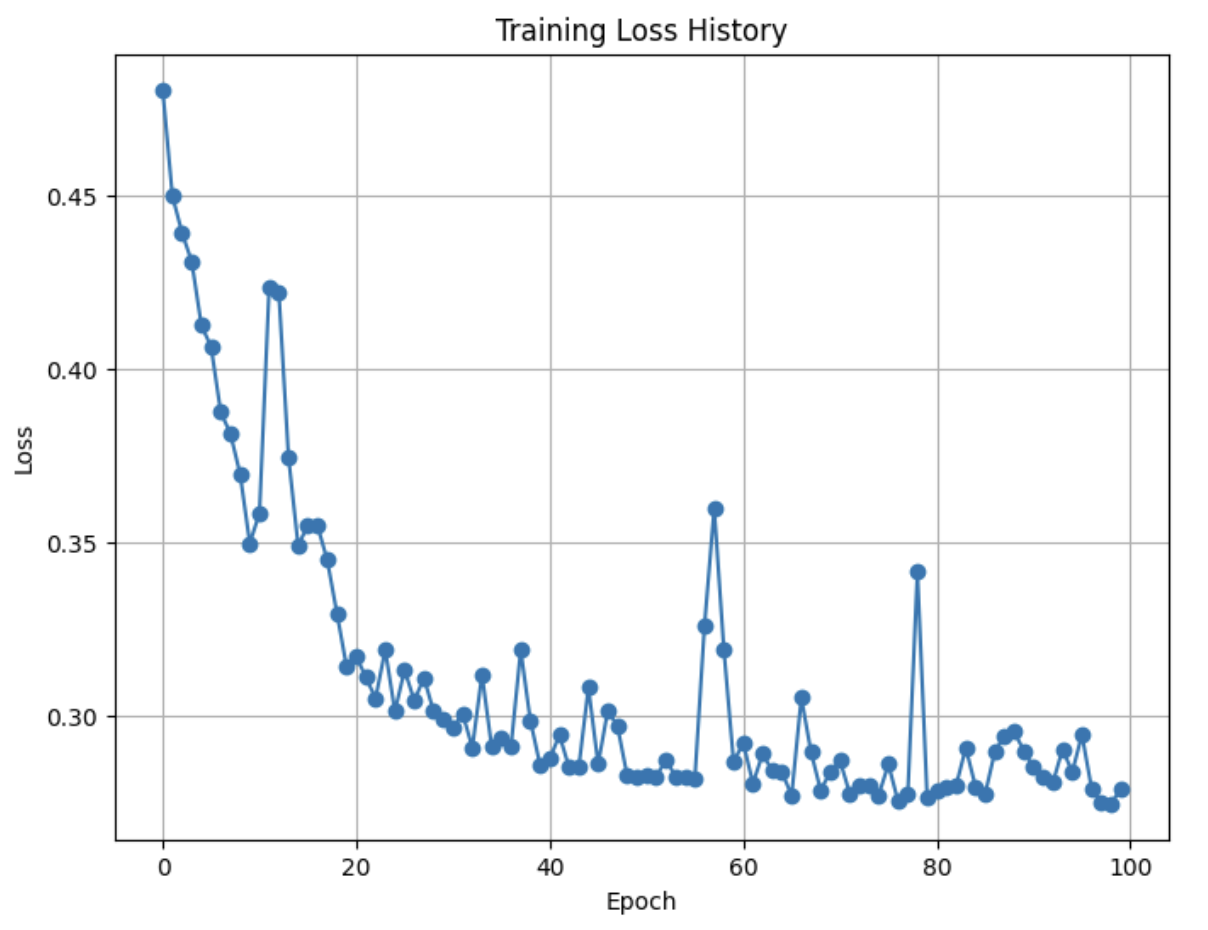
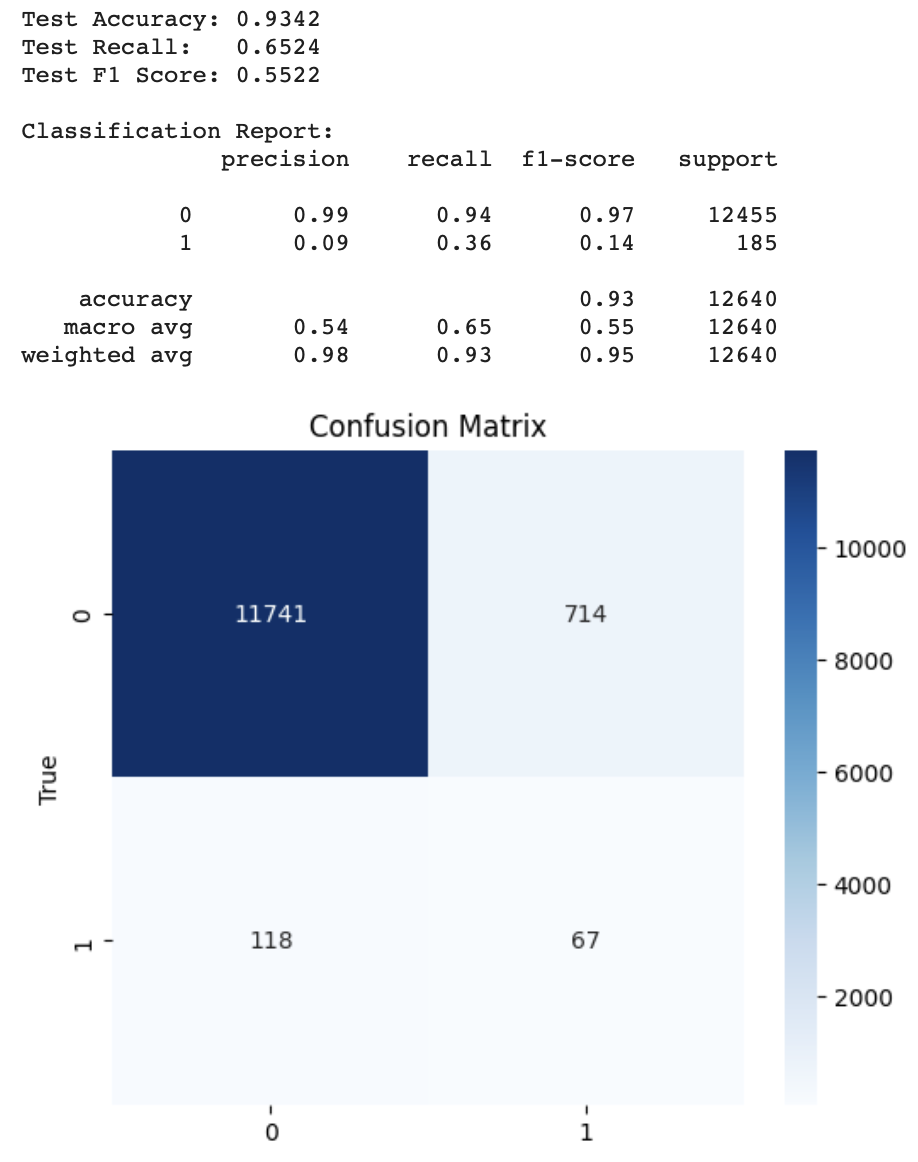

In [98]:
input_dim = 64  # embedding_dim
hidden_dim1 = 32
hidden_dim2 = 16
num_heads = 4  # Must be a factor of input_dim
num_classes = 2
num_epochs = 100
learning_rate = 1e-4  # Reduced learning rate for stability


model = TransformerClassifier(
    input_dim=input_dim,
    hidden_dim1=hidden_dim1,
    hidden_dim2=hidden_dim2,
    num_heads=num_heads,
    num_classes=num_classes,
    dropout=0.1
)

model.load_state_dict(torch.load("./MODEL_Training/transformer_classifier_100Epochs.pth",  map_location=torch.device('mps')))

<All keys matched successfully>

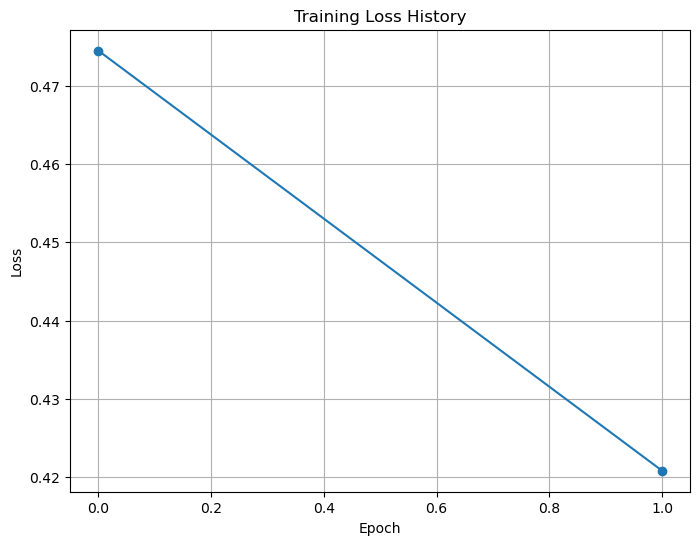

Test Accuracy: 0.0230
Test Recall:   0.5043
Test F1 Score: 0.0230

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     12455
           1       0.01      1.00      0.03       185

    accuracy                           0.02     12640
   macro avg       0.51      0.50      0.02     12640
weighted avg       0.99      0.02      0.02     12640



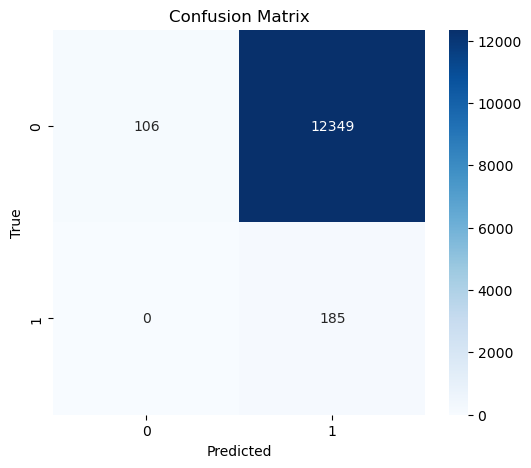

In [101]:
# Plot the training loss history
plt.figure(figsize=(8, 6))
plt.plot(loss_history, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss History")
plt.grid(True)
plt.show()

# Evaluate the model on the test dataset
model.eval()
all_preds = []
all_labels = []
device = next(model.parameters()).device  # get current device from model

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute performance metrics
acc = accuracy_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Recall:   {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Plot the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
